In [1]:
%load_ext autoreload
%autoreload 2

from train import *
from models import *
from tools import *

from keras import optimizers
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from IPython.display import display

import numpy as np
import os

Using TensorFlow backend.


In [2]:
X_train, y_train = load_data()
X_val, y_val = load_data("val")
X_test, _ = load_data("test")

input_shape = X_train[0].shape
print("Input shape: " + str(input_shape))
print(X_train[0][0][0])

y_train = to_categorical(y_train, 200)
y_val = to_categorical(y_val, 200)

Loading train data

Finished loading train data

Loading val data

Finished loading val data

Loading test data

Finished loading test data

Input shape: (64, 64, 3)
[0.75294118 0.83137255 0.83529412]


In [3]:
labels = get_label_dict()
words = get_word_labels()

test_images = os.listdir("data/tiny-imagenet-200/test/images/")
assert len(X_test) == len(test_images)

Loading labels

Done

Loading words

Done



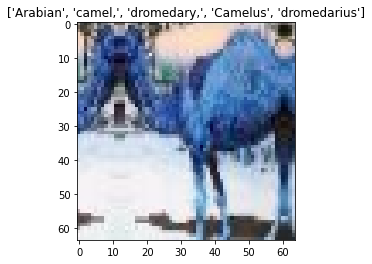

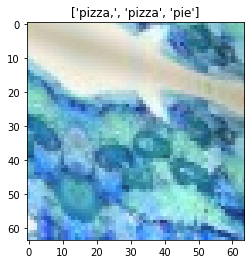

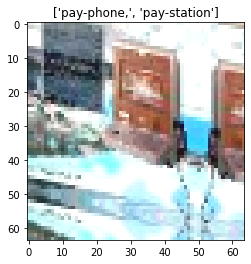

In [4]:
# Image preprocessing for the data
datagen = ImageDataGenerator(horizontal_flip=True, 
                             shear_range=40., 
                             zoom_range=0.5, 
                             width_shift_range=0.5,
                             channel_shift_range=0.1, 
                             fill_mode="reflect", 
                             preprocessing_function=shuffle_channels)

# Sample preprocessed images
for sample, label in datagen.flow(X_train, y_train, batch_size=3):
    for i in range(3):
        plt.plot()
        plt.title(words[labels[np.argmax(label[i])]])
        plt.imshow(sample[i])
        plt.show()
    break

testgen = ImageDataGenerator()

data = {"train": (X_train, y_train), 
        "val": (X_val, y_val)}

In [16]:
keras.backend.clear_session()

model = BravoNet(input_shape, "v3", net34=True)
model_prefix = "models/" + model.name + "/" + model.name
model_path = model_prefix + ".h5"

Model: "AlphaNet_v4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        

In [17]:
# Saves the best model based on monitor value between epochs
checkpoint = ModelCheckpoint(model_path, 
                             monitor="val_accuracy", 
                             verbose=1, 
                             save_best_only=True, 
                             period=1)

# Stops training early when no improvement for monitor value
early_stop = EarlyStopping(monitor="val_accuracy", 
                           min_delta=0, 
                           patience=10, 
                           verbose=1)

# Reduces learning rate when monitor value plateaus
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", 
                              factor=0.316, 
                              patience=5, 
                              verbose=1)

# Logs training data to CSV
restore = False # Whether or not we want to restore weights and continue training from a previous session
csv_log = CSVLogger(model_prefix + ".csv", separator=',', append=restore)

cb_list = [checkpoint, early_stop, reduce_lr, csv_log]

In [18]:
optim = optimizers.Adam(learning_rate=0.001)

history = train(model_path=model_path, 
                restore=restore, 
                epochs=300,
                model=model, 
                optim=optim, 
                datagen=datagen, 
                testgen=testgen, 
                data=data, 
                cb_list=cb_list, 
                batch_size=32)

Epoch 1/300
 - 114s - loss: 5.1417 - accuracy: 0.0275 - top3_accuracy: 0.0679 - top5_accuracy: 0.1010 - val_loss: 5.1302 - val_accuracy: 0.0733 - val_top3_accuracy: 0.1503 - val_top5_accuracy: 0.2059

Epoch 00001: val_accuracy improved from -inf to 0.07330, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 2/300
 - 93s - loss: 4.6780 - accuracy: 0.0602 - top3_accuracy: 0.1350 - top5_accuracy: 0.1908 - val_loss: 3.9500 - val_accuracy: 0.1176 - val_top3_accuracy: 0.2426 - val_top5_accuracy: 0.3187

Epoch 00002: val_accuracy improved from 0.07330 to 0.11760, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 3/300
 - 94s - loss: 4.4589 - accuracy: 0.0860 - top3_accuracy: 0.1786 - top5_accuracy: 0.2448 - val_loss: 3.7414 - val_accuracy: 0.1557 - val_top3_accuracy: 0.2995 - val_top5_accuracy: 0.3849

Epoch 00003: val_accuracy improved from 0.11760 to 0.15570, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 4/300
 - 96s - loss: 4.2921 - accuracy: 0.1057 - top3_accuracy: 0.


Epoch 00028: val_accuracy improved from 0.39000 to 0.39850, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 29/300
 - 94s - loss: 3.1740 - accuracy: 0.2818 - top3_accuracy: 0.4536 - top5_accuracy: 0.5406 - val_loss: 2.9188 - val_accuracy: 0.3991 - val_top3_accuracy: 0.5823 - val_top5_accuracy: 0.6643

Epoch 00029: val_accuracy improved from 0.39850 to 0.39910, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 30/300
 - 94s - loss: 3.1525 - accuracy: 0.2821 - top3_accuracy: 0.4563 - top5_accuracy: 0.5440 - val_loss: 1.9371 - val_accuracy: 0.3955 - val_top3_accuracy: 0.5799 - val_top5_accuracy: 0.6626

Epoch 00030: val_accuracy did not improve from 0.39910
Epoch 31/300
 - 94s - loss: 3.1476 - accuracy: 0.2838 - top3_accuracy: 0.4581 - top5_accuracy: 0.5451 - val_loss: 3.1031 - val_accuracy: 0.3990 - val_top3_accuracy: 0.5855 - val_top5_accuracy: 0.6692

Epoch 00031: val_accuracy did not improve from 0.39910
Epoch 32/300
 - 93s - loss: 3.1331 - accuracy: 0.2866 - top3_accur

Epoch 58/300
 - 94s - loss: 2.7291 - accuracy: 0.3605 - top3_accuracy: 0.5451 - top5_accuracy: 0.6311 - val_loss: 2.3653 - val_accuracy: 0.4683 - val_top3_accuracy: 0.6458 - val_top5_accuracy: 0.7240

Epoch 00058: val_accuracy improved from 0.46690 to 0.46830, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 59/300
 - 94s - loss: 2.7214 - accuracy: 0.3633 - top3_accuracy: 0.5458 - top5_accuracy: 0.6287 - val_loss: 1.8713 - val_accuracy: 0.4560 - val_top3_accuracy: 0.6365 - val_top5_accuracy: 0.7143

Epoch 00059: val_accuracy did not improve from 0.46830
Epoch 60/300
 - 96s - loss: 2.7148 - accuracy: 0.3622 - top3_accuracy: 0.5485 - top5_accuracy: 0.6333 - val_loss: 1.3639 - val_accuracy: 0.4653 - val_top3_accuracy: 0.6458 - val_top5_accuracy: 0.7204

Epoch 00060: val_accuracy did not improve from 0.46830
Epoch 61/300
 - 95s - loss: 2.7087 - accuracy: 0.3641 - top3_accuracy: 0.5488 - top5_accuracy: 0.6334 - val_loss: 2.4552 - val_accuracy: 0.4659 - val_top3_accuracy: 0.6481 - val


Epoch 00087: val_accuracy did not improve from 0.47600
Epoch 88/300
 - 95s - loss: 2.5867 - accuracy: 0.3860 - top3_accuracy: 0.5736 - top5_accuracy: 0.6576 - val_loss: 1.6842 - val_accuracy: 0.4761 - val_top3_accuracy: 0.6607 - val_top5_accuracy: 0.7349

Epoch 00088: val_accuracy improved from 0.47600 to 0.47610, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 89/300
 - 95s - loss: 2.5853 - accuracy: 0.3860 - top3_accuracy: 0.5751 - top5_accuracy: 0.6578 - val_loss: 2.1186 - val_accuracy: 0.4753 - val_top3_accuracy: 0.6608 - val_top5_accuracy: 0.7340

Epoch 00089: val_accuracy did not improve from 0.47610
Epoch 90/300
 - 95s - loss: 2.5913 - accuracy: 0.3870 - top3_accuracy: 0.5737 - top5_accuracy: 0.6562 - val_loss: 1.6472 - val_accuracy: 0.4757 - val_top3_accuracy: 0.6625 - val_top5_accuracy: 0.7353

Epoch 00090: val_accuracy did not improve from 0.47610
Epoch 91/300
 - 94s - loss: 2.5774 - accuracy: 0.3880 - top3_accuracy: 0.5756 - top5_accuracy: 0.6599 - val_loss: 2.2046 

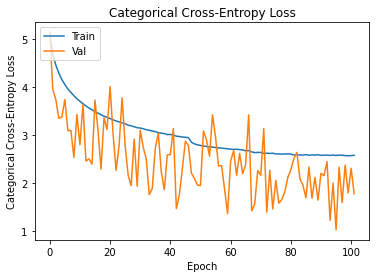

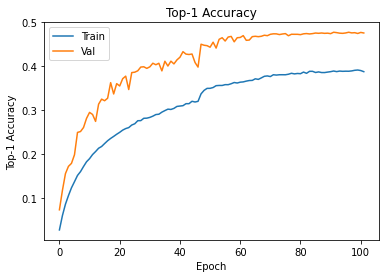

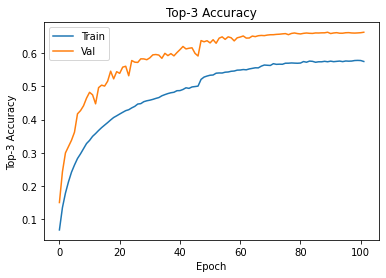

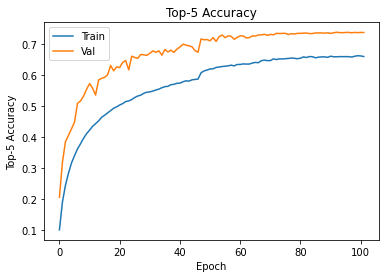

In [19]:
show_history(history)

In [20]:
# This loads the model and makes predictions on the test set
custom_metrics = {
    "top3_accuracy": top3_acc,
    "top5_accuracy": top5_acc
}
model = load_model(model_path, custom_objects=custom_metrics)
output = model.predict(X_test)
results = []

for result in output:
    results.append(labels[np.argmax(result)])
    
assert len(results) == len(X_test)
print("Test images predicted:", len(results))

Test images predicted: 10000


In [21]:
# This writes the test set predictions to file
with open(model_prefix + " Predictions.txt", "w") as test_file:
    for i in range(len(results)):
        test_file.write(test_images[i] + " " + results[i] + "\n")
    print("Predictions saved at", test_file.name)

Predictions saved at models/AlphaNet_v4/AlphaNet_v4 Predictions.txt


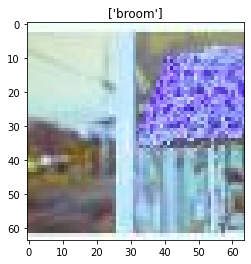

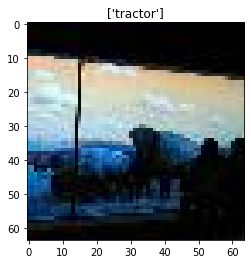

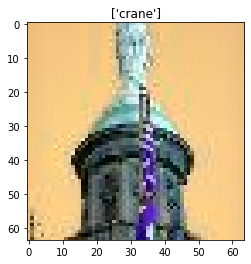

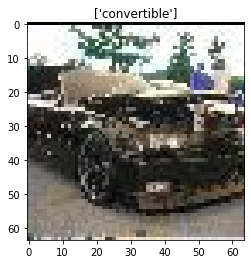

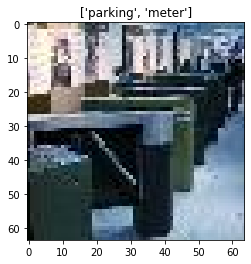

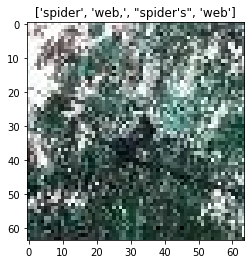

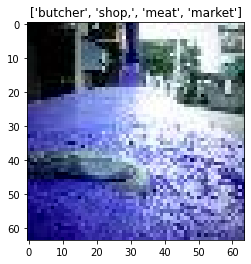

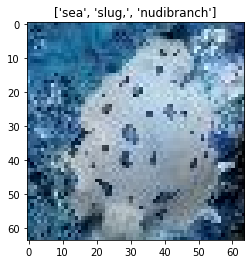

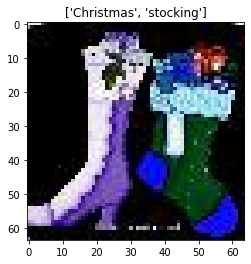

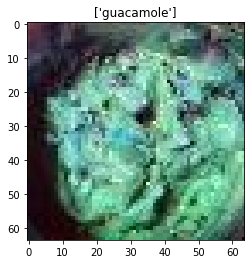

In [25]:
# This shows some test set images and the model's predictions on them
display_dim = 128
for _ in range(10):
    index = np.random.randint(len(X_test))
    word_label = words[results[index]]
    plt.plot()
    plt.title(word_label)
    plt.imshow(X_test[index])
    plt.show()

In [26]:
# This saves an HTML version of the notebook for later viewing
# NOTE: Make sure to check if the html was completely saved, sometimes it doesn't
from nbconvert import HTMLExporter
import codecs
import nbformat
exporter = HTMLExporter()
output_notebook = nbformat.read("Training.ipynb", as_version=nbformat.NO_CONVERT)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(model_prefix + ".html", "w").write(output)

787059